*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-0112numpy-average/'
FileBaseName = '1Error-0112numpy-average'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0112numpy-average/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0112numpy-average/


最確値を書式化して文字列として返す関数

Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

1.1.11 荷重平均(加重平均)

  以下の計測データを用いる
  *   887.6 ±3.0 sec
  *   893.5 ±5.3 sec
  *   882.6 ±2.7 sec

1.1.11 (1)荷重平均
$$
      \overline{x}
      =
      \frac{
        \displaystyle
        \;\;
        \sum^{M}
        w_{m}\,x_{m}
        \;\;
      }{
        \displaystyle
        \sum^{M}
        w_{m}
      }
$$

1.1.11 (2)荷重平均の重み
$$
      w_i
      \propto
      \frac{1}{\varepsilon_{\textrm{m}:m}^2}
      \propto
      \frac{1}{\sigma_{\textrm{m}:m}^2}
$$

1.1.11 (3)荷重平均値の標準偏差

  荷重平均値の標準偏差$\sigma_\textrm{m}$は次式で得られる。
$$
      \frac{
        1
      }{
        \sigma_\textrm{m}
      }
      =
      \sqrt{
        \sum^{M}
        \frac{1}{\sigma_{\textrm{m}:m}^2}
      }
$$

In [5]:
############################################
# 計測データ
# 887.6 ±3.0 sec 893.5 ±5.3 sec 882.6 ±2.7 sec
Taudata = np.array( [ [887.6, 3.0], [893.5, 5.3], [882.6, 2.7] ] )
#
Tau_values = Taudata[:,0]
Tau_std    = Taudata[:,1]
#
# 荷重として逆分散を用いる
Tau_weight = Tau_std**(-2)
#
# returned=Trueを指定して、荷重の和も得る。
Tau_wmean, Tau_weights = np.average( Tau_values, weights=Tau_weight, returned=True )
#
# 荷重の和から、荷重平均の標準偏差を求める。
Tau_wmean_std = Tau_weights**(-1/2)
#
print( '平均値   = %.1f sec' % Tau_wmean )
print( '標準偏差 = %.1f sec' % Tau_wmean_std )
print( '最確値   = %s' % Format_MostProbableValue( Tau_wmean, Tau_wmean_std, 'sec' ) )

平均値   = 885.9 sec
標準偏差 = 1.9 sec
最確値   = $+885.9$ +/- $1.9$ sec


C:\Users\iakai\AppData\Local\Temp\ipykernel_23084\1475363603.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels( xx_ticks )


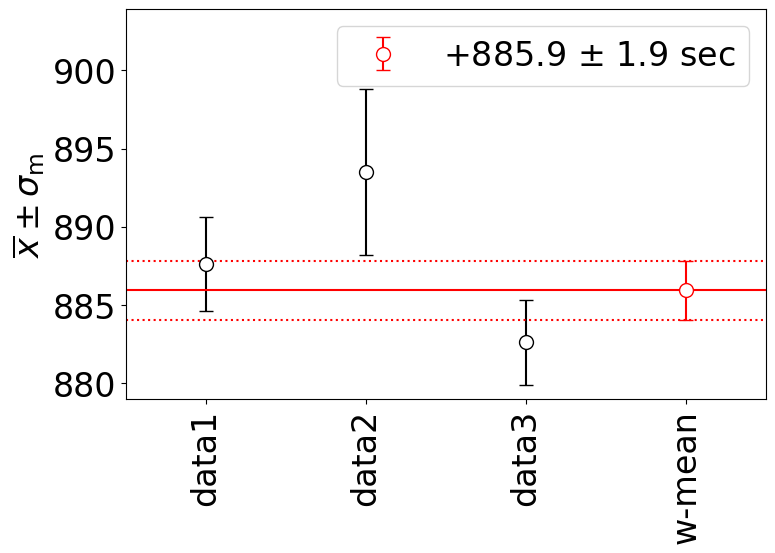

In [6]:
########################################
label_Tau_wmean = Format_MostProbableValue( Tau_wmean, Tau_wmean_std, 'sec', latex=True )
########################################
xx       = [1,2,3]
xx_ticks = ['', 'data1', 'data2', 'data3', 'w-mean']
########################################
plt.rcParams['font.size'] = 24
#
fig = plt.figure( figsize=(8,6) )
#
# グラフのmarginの調整
fig.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.3)
#
# 1つ目のグラフの軸を生成する
ax1 = fig.add_subplot(1,1,1)
#
ax1.set_ylabel( r'$\overline{x}\pm\sigma_{\rm{}m}$' )
ax1.set_xlim( 0.5, 4.5 )
#
ax1.errorbar( xx, Tau_values, yerr=Tau_std, capsize=5, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", color='w' )
ax1.errorbar( 4, Tau_wmean, yerr=Tau_wmean_std, label=label_Tau_wmean, capsize=5, fmt='o', markersize=10, ecolor='red', markeredgecolor = "red", color='w' )
#
(y_bot,y_top) = ax1.set_ylim()
#
y_top = y_bot + 1.2*(y_top-y_bot)
ax1.set_ylim(y_bot,y_top)
#
ax1.set_xticklabels( xx_ticks )
ax1.axhline( Tau_wmean, color='red', linestyle='solid' )
ax1.axhline( Tau_wmean + Tau_wmean_std, color='red', linestyle='dotted' )
ax1.axhline( Tau_wmean - Tau_wmean_std, color='red', linestyle='dotted' )
#
# 横軸の目盛り数値が重ならないように、90度回転させる
plt.xticks(rotation=90)
#
plt.legend()
#
#
# 図をpdfに保存
pdf_path = FilePath + FileBaseName + '.pdf'
fig.savefig( pdf_path )